In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
fi = pd.read_csv('/content/drive/MyDrive/Badrachalam.csv')
print(fi.shape)
fi


(10, 10)


,S.No.,DO (mg/L),pH,BOD (mg/L),Turbidity (NTU),COD (mg/L),TDS (mg/L),EC,TSS (mg/L),Year
0,1,5.20,7.97,2.40,16.0,23.0,242.0,387,15.0,2014
1,2,5.30,7.35,4.80,31.0,34.0,286.0,366,20.0,2015
2,3,5.40,7.75,5.00,28.0,35.0,256.0,399,20.0,2016
3,4,5.70,8.37,3.00,12.0,32.0,197.0,319,31.0,2017
4,5,5.40,7.91,3.00,18.0,18.0,219.0,334,11.0,2018
5,6,5.00,7.78,3.00,7.0,14.0,244.0,400,8.0,2019
6,7,5.40,7.88,2.80,11.0,20.0,187.0,305,29.0,2020
7,8,5.40,7.83,2.20,12.0,18.0,213.0,353,14.0,2021
8,9,5.70,8.03,1.50,9.0,12.0,211.0,338,14.0,2022
9,10,5.81,7.62,1.72,7.3,24.6,223.5,360,13.5,2023


In [ ]:
cols = list(fi)[1:8]
print(cols)

['DO (mg/L)', 'pH', 'BOD (mg/L)', 'Turbidity (NTU)', 'COD (mg/L)', 'TDS (mg/L)', 'EC']


<Axes: >

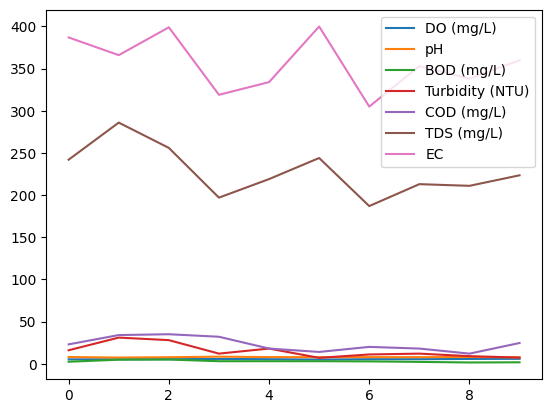

In [ ]:
df_for_training = fi[cols].astype(float)
df_for_training.plot()

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
df_for_training

,DO (mg/L),pH,BOD (mg/L),Turbidity (NTU),COD (mg/L),TDS (mg/L),EC
0,5.20,7.97,2.40,16.0,23.0,242.0,387.0
1,5.30,7.35,4.80,31.0,34.0,286.0,366.0
2,5.40,7.75,5.00,28.0,35.0,256.0,399.0
3,5.70,8.37,3.00,12.0,32.0,197.0,319.0
4,5.40,7.91,3.00,18.0,18.0,219.0,334.0
5,5.00,7.78,3.00,7.0,14.0,244.0,400.0
6,5.40,7.88,2.80,11.0,20.0,187.0,305.0
7,5.40,7.83,2.20,12.0,18.0,213.0,353.0
8,5.70,8.03,1.50,9.0,12.0,211.0,338.0
9,5.81,7.62,1.72,7.3,24.6,223.5,360.0


In [ ]:
n_future = 1
n_past = 3

In [ ]:
trainX = []
trainYP = []
trainYN = []
trainYS = []
trainYA = []
trainYB = []
trainYC = []
trainYD = []

In [ ]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
  trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
  trainYP.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])
  trainYN.append(df_for_training_scaled[i + n_future - 1:i + n_future, 1])
  trainYS.append(df_for_training_scaled[i + n_future - 1:i + n_future, 2])
  trainYA.append(df_for_training_scaled[i + n_future - 1:i + n_future, 3])
  trainYB.append(df_for_training_scaled[i + n_future - 1:i + n_future, 4])
  trainYC.append(df_for_training_scaled[i + n_future - 1:i + n_future, 5])
  trainYD.append(df_for_training_scaled[i + n_future - 1:i + n_future, 6])


In [ ]:
print( trainX)
print(trainYP)

[array([[-0.98634222,  0.4783356 , -0.49202106,  0.10977352, -0.00768521,
         0.50480933,  0.99476289],
       [-0.55935425, -1.97264022,  1.68666998,  2.00242044,  1.4012703 ,
         2.07453445,  0.31871044],
       [-0.13236627, -0.39136549,  1.86822756,  1.62389106,  1.52935716,
         1.00426732,  1.38107858]]), array([[-0.55935425, -1.97264022,  1.68666998,  2.00242044,  1.4012703 ,
         2.07453445,  0.31871044],
       [-0.13236627, -0.39136549,  1.86822756,  1.62389106,  1.52935716,
         1.00426732,  1.38107858],
       [ 1.14859765,  2.05961033,  0.0526517 , -0.39493232,  1.14509657,
        -1.10059136, -1.19435933]]), array([[-0.13236627, -0.39136549,  1.86822756,  1.62389106,  1.52935716,
         1.00426732,  1.38107858],
       [ 1.14859765,  2.05961033,  0.0526517 , -0.39493232,  1.14509657,
        -1.10059136, -1.19435933],
       [-0.13236627,  0.2411444 ,  0.0526517 ,  0.36212644, -0.64811953,
        -0.3157288 , -0.71146472]]), array([[ 1.14859765, 

In [ ]:
trainX, trainYP, trainYN, trainYS,trainYA,trainYB,trainYC,trainYD= np.array(trainX), np.array(trainYP), np.array(trainYN), np.array(trainYS),np.array(trainYA),np.array(trainYB),np.array(trainYC),np.array(trainYD)
print('trainX shape == {}.'.format(trainX.shape))
print('trainYP shape == {}.'.format(trainYP.shape))
print('trainYN shape == {}.'.format(trainYN.shape))
print('trainYS shape == {}.'.format(trainYS.shape))
print('trainYA shape == {}.'.format(trainYA.shape))
print('trainYB shape == {}.'.format(trainYB.shape))
print('trainYC shape == {}.'.format(trainYC.shape))
print('trainYD shape == {}.'.format(trainYD.shape))

trainX shape == (7, 3, 7).
trainYP shape == (7, 1).
trainYN shape == (7, 1).
trainYS shape == (7, 1).
trainYA shape == (7, 1).
trainYB shape == (7, 1).
trainYC shape == (7, 1).
trainYD shape == (7, 1).


In [ ]:
list1=[]

In [ ]:
modelP = Sequential()
modelP.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelP.add(LSTM(32, activation='relu', return_sequences=False))
modelP.add(Dropout(0.2))
modelP.add(Dense(trainYP.shape[1]))

In [ ]:
modelP.compile(optimizer='adam', loss='mse')
modelP.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 64)             18432     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

history = modelP.fit(trainX, trainYP, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 4s 435ms/step - loss: 1.0134 - val_loss: 2.6348
Epoch 2/50
2/2 [==============================] - 0s 32ms/step - loss: 0.9983 - val_loss: 2.6177
Epoch 3/50
2/2 [==============================] - 0s 37ms/step - loss: 0.9945 - val_loss: 2.6142
Epoch 4/50
2/2 [==============================] - 0s 32ms/step - loss: 1.0069 - val_loss: 2.6055
Epoch 5/50
2/2 [==============================] - 0s 33ms/step - loss: 0.9743 - val_loss: 2.5986
Epoch 6/50
2/2 [==============================] - 0s 38ms/step - loss: 0.9705 - val_loss: 2.5978
Epoch 7/50
2/2 [==============================] - 0s 35ms/step - loss: 0.9684 - val_loss: 2.5968
Epoch 8/50
2/2 [==============================] - 0s 35ms/step - loss: 0.9569 - val_loss: 2.5958
Epoch 9/50
2/2 [==============================] - 0s 34ms/step - loss: 0.9622 - val_loss: 2.5947
Epoch 10/50
2/2 [==============================] - 0s 34ms/step - loss: 0.9360 - val_loss: 2.5922
Epoch 11/50
2/2 [===========

In [ ]:
historyP = history

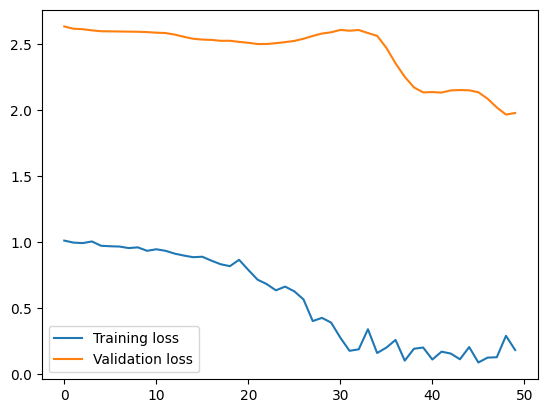

In [ ]:
plt.plot(historyP.history['loss'], label='Training loss')
plt.plot(historyP.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionP = modelP.predict(trainX)

1/1 [==============================] - 0s 319ms/step


In [ ]:
prediction_copiesP = np.repeat(predictionP, df_for_training.shape[1], axis=-1)
y_pred_futureP = scaler.inverse_transform(prediction_copiesP)[:,0]

In [ ]:
print(y_pred_futureP)

[5.7111707 5.4150333 5.0405517 5.374381  5.5456443 5.654908  5.480487 ]


In [ ]:
print(y_pred_futureP[-1])
i=y_pred_futureP[-1]
do=((i)*100/9)*0.3723
do

5.480487


22.67094735145569

In [ ]:
modelN = Sequential()
modelN.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelN.add(LSTM(32, activation='relu', return_sequences=False))
modelN.add(Dropout(0.2))
modelN.add(Dense(trainYN.shape[1]))

In [ ]:
modelN.compile(optimizer='adam', loss='mse')
modelN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 3, 64)             18432     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
historyN = modelN.fit(trainX, trainYN, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 3s 560ms/step - loss: 0.7695 - val_loss: 0.8841
Epoch 2/50
2/2 [==============================] - 0s 45ms/step - loss: 0.7537 - val_loss: 0.9028
Epoch 3/50
2/2 [==============================] - 0s 47ms/step - loss: 0.7304 - val_loss: 0.9172
Epoch 4/50
2/2 [==============================] - 0s 53ms/step - loss: 0.7536 - val_loss: 0.9291
Epoch 5/50
2/2 [==============================] - 0s 71ms/step - loss: 0.7055 - val_loss: 0.9386
Epoch 6/50
2/2 [==============================] - 0s 68ms/step - loss: 0.7087 - val_loss: 0.9499
Epoch 7/50
2/2 [==============================] - 0s 74ms/step - loss: 0.6752 - val_loss: 0.9590
Epoch 8/50
2/2 [==============================] - 0s 75ms/step - loss: 0.6364 - val_loss: 0.9715
Epoch 9/50
2/2 [==============================] - 0s 61ms/step - loss: 0.5951 - val_loss: 0.9846
Epoch 10/50
2/2 [==============================] - 0s 62ms/step - loss: 0.6097 - val_loss: 1.0000
Epoch 11/50
2/2 [===========

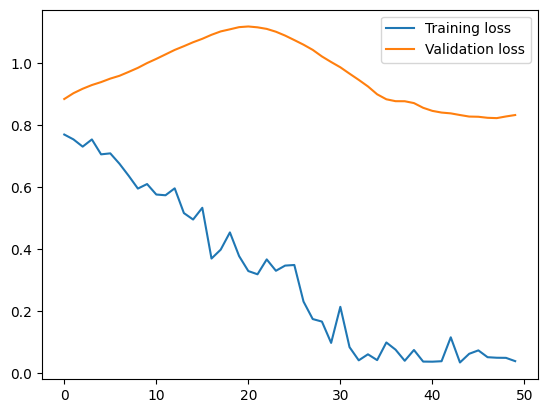

In [ ]:
plt.plot(historyN.history['loss'], label='Training loss')
plt.plot(historyN.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionN = modelN.predict(trainX)

1/1 [==============================] - 0s 294ms/step


In [ ]:
prediction_copiesN = np.repeat(predictionN, df_for_training.shape[1], axis=-1)
y_pred_futureN = scaler.inverse_transform(prediction_copiesN)[:,1]

In [ ]:
print(y_pred_futureN)

[8.3433485 7.91188   7.8113647 7.855458  7.9126234 7.9759207 7.850785 ]


In [ ]:
print(y_pred_futureN[-1])
i=y_pred_futureN[-1]
ph=((i-7)*100/1.5)*0.1176

7.850785


In [ ]:
modelS = Sequential()
modelS.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelS.add(LSTM(32, activation='relu', return_sequences=False))
modelS.add(Dropout(0.2))
modelS.add(Dense(trainYS.shape[1]))

In [ ]:
modelS.compile(optimizer='adam', loss='mse')
modelS.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 64)             18432     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modelS.compile(optimizer='adam', loss='mse')
modelS.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 64)             18432     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
historyS = modelS.fit(trainX, trainYS, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 3s 400ms/step - loss: 0.3658 - val_loss: 1.1783
Epoch 2/50
2/2 [==============================] - 0s 31ms/step - loss: 0.3475 - val_loss: 1.1536
Epoch 3/50
2/2 [==============================] - 0s 32ms/step - loss: 0.3402 - val_loss: 1.1280
Epoch 4/50
2/2 [==============================] - 0s 32ms/step - loss: 0.3322 - val_loss: 1.0999
Epoch 5/50
2/2 [==============================] - 0s 32ms/step - loss: 0.3243 - val_loss: 1.0699
Epoch 6/50
2/2 [==============================] - 0s 33ms/step - loss: 0.3001 - val_loss: 1.0409
Epoch 7/50
2/2 [==============================] - 0s 32ms/step - loss: 0.3028 - val_loss: 1.0106
Epoch 8/50
2/2 [==============================] - 0s 32ms/step - loss: 0.2862 - val_loss: 0.9770
Epoch 9/50
2/2 [==============================] - 0s 35ms/step - loss: 0.2603 - val_loss: 0.9407
Epoch 10/50
2/2 [==============================] - 0s 34ms/step - loss: 0.2518 - val_loss: 0.9023
Epoch 11/50
2/2 [===========

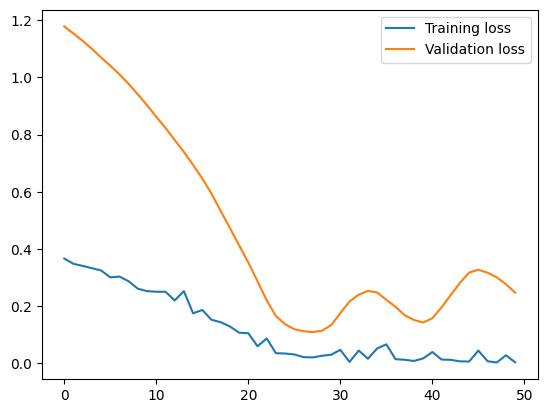

In [ ]:
plt.plot(historyS.history['loss'], label='Training loss')
plt.plot(historyS.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionS = modelS.predict(trainX)

1/1 [==============================] - 0s 290ms/step


In [ ]:
prediction_copiesS = np.repeat(predictionS, df_for_training.shape[1], axis=-1)
y_pred_futureS = scaler.inverse_transform(prediction_copiesS)[:,2]

In [ ]:
print(y_pred_futureS)

[2.9629536 3.0324361 3.0052016 2.7764094 2.2346869 1.6324424 2.2670295]


In [ ]:
i=y_pred_futureS[-1]
bod=(i*100/25)*0.3723
print(i)

2.2670295


In [ ]:
modelS = Sequential()
modelS.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelS.add(LSTM(32, activation='relu', return_sequences=False))
modelS.add(Dropout(0.2))
modelS.add(Dense(trainYA.shape[1]))

In [ ]:
modelS.compile(optimizer='adam', loss='mse')
modelS.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 3, 64)             18432     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
historyS = modelS.fit(trainX, trainYS, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 4s 592ms/step - loss: 0.3822 - val_loss: 1.2357
Epoch 2/50
2/2 [==============================] - 0s 32ms/step - loss: 0.3660 - val_loss: 1.2052
Epoch 3/50
2/2 [==============================] - 0s 33ms/step - loss: 0.3541 - val_loss: 1.1785
Epoch 4/50
2/2 [==============================] - 0s 33ms/step - loss: 0.3516 - val_loss: 1.1544
Epoch 5/50
2/2 [==============================] - 0s 32ms/step - loss: 0.3435 - val_loss: 1.1336
Epoch 6/50
2/2 [==============================] - 0s 32ms/step - loss: 0.3306 - val_loss: 1.1125
Epoch 7/50
2/2 [==============================] - 0s 40ms/step - loss: 0.3245 - val_loss: 1.0905
Epoch 8/50
2/2 [==============================] - 0s 38ms/step - loss: 0.3174 - val_loss: 1.0676
Epoch 9/50
2/2 [==============================] - 0s 34ms/step - loss: 0.3197 - val_loss: 1.0442
Epoch 10/50
2/2 [==============================] - 0s 33ms/step - loss: 0.3099 - val_loss: 1.0207
Epoch 11/50
2/2 [===========

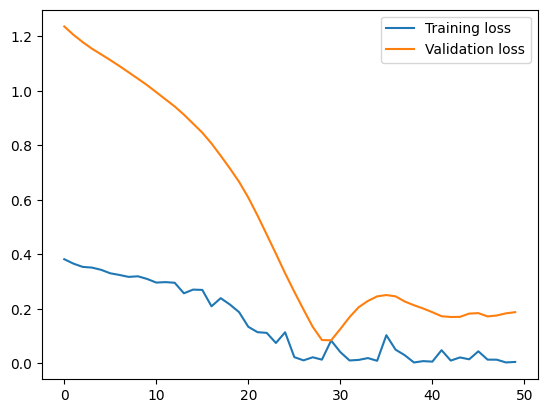

In [ ]:
plt.plot(historyS.history['loss'], label='Training loss')
plt.plot(historyS.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionS = modelS.predict(trainX)

1/1 [==============================] - 0s 302ms/step


In [ ]:
prediction_copiesS = np.repeat(predictionS, df_for_training.shape[1], axis=-1)
y_pred_futureS = scaler.inverse_transform(prediction_copiesS)[:,2]

In [ ]:
print(y_pred_futureS)

[2.967723  3.0295362 3.020599  2.7845922 2.18467   1.5719475 2.197788 ]


In [ ]:
i=y_pred_futureS[-1]
tur=(i*100/5)*0.1
print(tur)

4.395576000213623


In [ ]:
modelS = Sequential()
modelS.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelS.add(LSTM(32, activation='relu', return_sequences=False))
modelS.add(Dropout(0.2))
modelS.add(Dense(trainYB.shape[1]))

In [ ]:
modelS.compile(optimizer='adam', loss='mse')
modelS.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 3, 64)             18432     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
historyS = modelS.fit(trainX, trainYS, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 3s 389ms/step - loss: 0.4006 - val_loss: 1.2591
Epoch 2/50
2/2 [==============================] - 0s 37ms/step - loss: 0.3800 - val_loss: 1.2292
Epoch 3/50
2/2 [==============================] - 0s 33ms/step - loss: 0.3661 - val_loss: 1.2038
Epoch 4/50
2/2 [==============================] - 0s 32ms/step - loss: 0.3485 - val_loss: 1.1795
Epoch 5/50
2/2 [==============================] - 0s 32ms/step - loss: 0.3425 - val_loss: 1.1538
Epoch 6/50
2/2 [==============================] - 0s 33ms/step - loss: 0.3304 - val_loss: 1.1292
Epoch 7/50
2/2 [==============================] - 0s 35ms/step - loss: 0.3326 - val_loss: 1.1046
Epoch 8/50
2/2 [==============================] - 0s 33ms/step - loss: 0.3244 - val_loss: 1.0809
Epoch 9/50
2/2 [==============================] - 0s 34ms/step - loss: 0.3175 - val_loss: 1.0557
Epoch 10/50
2/2 [==============================] - 0s 35ms/step - loss: 0.3065 - val_loss: 1.0303
Epoch 11/50
2/2 [===========

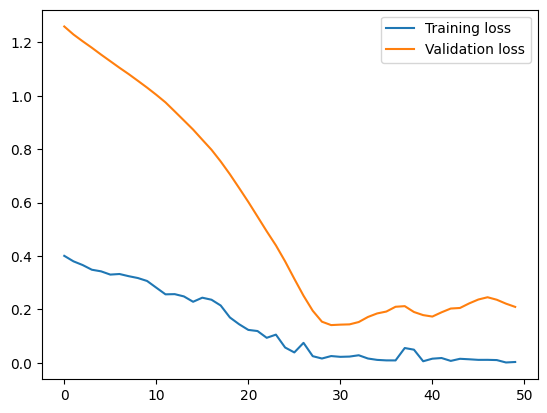

In [ ]:
plt.plot(historyS.history['loss'], label='Training loss')
plt.plot(historyS.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionS = modelS.predict(trainX)

1/1 [==============================] - 0s 283ms/step


In [ ]:
prediction_copiesS = np.repeat(predictionS, df_for_training.shape[1], axis=-1)
y_pred_futureS = scaler.inverse_transform(prediction_copiesS)[:,2]

In [ ]:
print(y_pred_futureS)
i=y_pred_futureS[-1]
cod=(i*100/10)*0.12
print(cod)

[2.9521592 2.9971423 2.9890747 2.8402743 2.1848204 1.5811108 2.2241492]
2.6689790725708007


In [ ]:
l=[do,ph,bod,tur,cod]
print(l)
print(sum(l))

[22.67094735145569, 6.670152664184569, 3.3760603669166565, 4.395576000213623, 2.6689790725708007]
39.78171545534134


In [ ]:
modelP = Sequential()
modelP.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelP.add(LSTM(32, activation='relu', return_sequences=False))
modelP.add(Dropout(0.2))
modelP.add(Dense(trainYC.shape[1]))

In [ ]:
modelP.compile(optimizer='adam', loss='mse')
modelP.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 3, 64)             18432     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = modelP.fit(trainX, trainYP, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 3s 384ms/step - loss: 1.0319 - val_loss: 2.4723
Epoch 2/50
2/2 [==============================] - 0s 32ms/step - loss: 1.0078 - val_loss: 2.4800
Epoch 3/50
2/2 [==============================] - 0s 31ms/step - loss: 1.0015 - val_loss: 2.4817
Epoch 4/50
2/2 [==============================] - 0s 31ms/step - loss: 0.9912 - val_loss: 2.4832
Epoch 5/50
2/2 [==============================] - 0s 32ms/step - loss: 0.9750 - val_loss: 2.4798
Epoch 6/50
2/2 [==============================] - 0s 36ms/step - loss: 0.9904 - val_loss: 2.4788
Epoch 7/50
2/2 [==============================] - 0s 34ms/step - loss: 0.9663 - val_loss: 2.4763
Epoch 8/50
2/2 [==============================] - 0s 33ms/step - loss: 0.9541 - val_loss: 2.4663
Epoch 9/50
2/2 [==============================] - 0s 32ms/step - loss: 0.9586 - val_loss: 2.4567
Epoch 10/50
2/2 [==============================] - 0s 32ms/step - loss: 0.9536 - val_loss: 2.4446
Epoch 11/50
2/2 [===========

In [ ]:
historyP = history

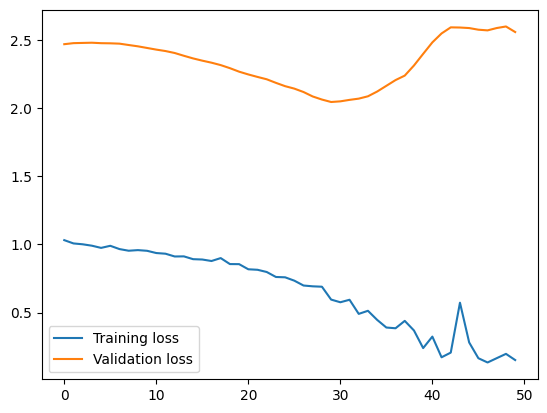

In [ ]:
plt.plot(historyP.history['loss'], label='Training loss')
plt.plot(historyP.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionP = modelP.predict(trainX)

1/1 [==============================] - 0s 277ms/step


In [ ]:
prediction_copiesP = np.repeat(predictionP, df_for_training.shape[1], axis=-1)
y_pred_futureP = scaler.inverse_transform(prediction_copiesP)[:,0]

In [ ]:
print(y_pred_futureP)
ec=y_pred_futureP[-1]
print(ec)

[5.766225  5.3435616 5.122526  5.302869  5.4921074 5.6861176 5.435158 ]
5.435158


In [ ]:
l=[do,ph,bod,tur,cod,ec]
print(l)
WQI=sum(l)
print(WQI)

[22.67094735145569, 6.670152664184569, 3.3760603669166565, 4.395576000213623, 2.6689790725708007, 5.435158]
45.21687323122025


In [ ]:
def get_WQI_bucket(x):
    if x>=0 and x <= 25:
        return "Excellent"
    elif x>=26 and x<=50:
        return "Good"
    elif x >=51 and x<=75:
        return "Poor"
    elif x>=76 and x<100:
        return "Very Poor"
    else:
        return "Not Suitable for drinking"
result=get_WQI_bucket(WQI)
print(result)

Good
